# Task 1. Set up an “Analysis Pipeline” (20%)¶
Each person in a group should do this Task in their own Jupyter notebook!

Often when Data Scientists do analyses with the same or similar datasets, they set up an “analysis pipeline”. This has several advantages:

* record the steps so you can remember what you did.

* allows you to repeat the steps reproducibly, without doing a bunch of manual and repetitive work.

* make changes to thes series of processing steps so you can improve and iterate.

* troubleshoot and debug errors in your processing.

* allows others to reproduce your analysis.

* if your data changes, you can update your outputs (report, images, etc…) easily without redoing all your processing.

* allows you to spend more effort and energy on your analysis and visualizations (if you do a good job with the pipeline).



# Analysis Pipeline
1. Load Data

* Load data using `pandas.read_csv` with raw data at `data/raw/anime.csv`

* delimiters (space, comma, tab) are handled by Pandas

* Skip rows that have `Unknown` data

2. Clean Data

* Remove columns not being used like `['MAL_ID','Producers', 'Licensors', 'English name', 'Japanese name'`

* Deal with “incorrect” data like converting `Duration` into Minutes rather than string with the function `convert(episodeLength)`.

* Deal with missing data by using `dropna` to remove `NaN` valued data.

* Made sure that only anime with complete data will be displayed

3. Process Data

* Create any new columns needed that are combinations or aggregates of other columns (examples include weighted averages, categorizations, groups, etc…).

* Find and replace operations (examples inlcude replacing the string ‘Strongly Agree’ with the number 5).

* Other substitutions as needed.

* Deal with outliers.

4. Wrangle Data

* Restructure data format (columns and rows).

* Merge other data sources into your dataset.

* Exploratory Data Analysis (not required for this Task).

* Data Analysis (not required for this Task).

* Export reports/data analyses and visualizations (not required for this Task).



In [1]:
#Import depedancies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../scripts/')
import project_functions as pf

In [2]:
# Method Chaining
# Loading data
df = pd.read_csv('../../data/raw/anime.csv')

#load and process
pdf = pf.load_and_process(df)
pdf

pdf.to_csv('../../data/processed/clean_anime.csv', index=False)

pdf = pd.read_csv('../../data/processed/clean_anime.csv')


# Task 3: EDA
- Question 1 : Average `duration` of each anime episodes that are aired on `TV`
- Question 2 : `Studio` with the highest average `Score` or `Ranking`
- Question 3 : Most `Genres` seen in anime
- Question 4 : `Sources` with the highest `Score`
- Question 5 : Average `duration` of each anime episodes that are aired on `Movie

In [3]:
# Let's explore the general information about the dataset and see what we have
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                3306 non-null   object 
 1   Score               3306 non-null   float64
 2   Genres              3306 non-null   object 
 3   Type                3306 non-null   object 
 4   Episodes            3306 non-null   int64  
 5   Aired               3306 non-null   object 
 6   Premiered           3306 non-null   object 
 7   Studios             3306 non-null   object 
 8   Source              3306 non-null   object 
 9   Duration (Minutes)  3306 non-null   int64  
 10  Rating              3306 non-null   object 
 11  Ranked              3306 non-null   float64
 12  Popularity          3306 non-null   int64  
 13  Members             3306 non-null   int64  
 14  Favorites           3306 non-null   int64  
 15  Watching            3306 non-null   int64  
 16  Comple

# pdf.nunique(axis = 0)
- Unique Entry `count` on `Name` which is 3306
- Total of 489 `Studio`
- 5 kind of `Rating`
- 3253 unique `Users` 


In [4]:
pdf.nunique(axis = 0)

Name                  3306
Score                  408
Genres                2079
Type                     1
Episodes               153
Aired                 2542
Premiered              203
Studios                489
Source                  15
Duration (Minutes)      37
Rating                   5
Ranked                2863
Popularity            2801
Members               3253
Favorites             1340
Watching              2609
Completed             3150
On-Hold               2455
Dropped               2587
Plan to Watch         3147
Score-10              2221
Score-9               2331
Score-8               2674
Score-7               2825
Score-6               2652
Score-5               2379
Score-4               1849
Score-3               1352
Score-2               1003
Score-1                956
dtype: int64

# From DF.describe
- Generate descriptive statistics.


In [5]:
pdf.describe()

,Score,Episodes,Duration (Minutes),Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
count,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3.306000e+03,3306.000000,3306.000000,3.306000e+03,3306.000000,...,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000
mean,6.989492,26.921355,21.441319,3953.681791,3386.106473,1.361595e+05,2090.861162,9885.641258,8.588078e+04,4314.740472,...,9918.395342,13221.958560,18197.400484,15303.735935,7333.739262,3647.340895,1690.356019,763.886570,437.862976,417.400786
std,0.778039,54.236763,6.367160,2770.632380,2960.277736,2.491431e+05,8684.466169,26374.033754,1.848136e+05,8286.632403,...,34333.305992,37632.498439,40916.370781,28385.040691,12731.284238,6449.454099,3535.178112,1779.835455,1148.581829,1207.990133
min,2.180000,3.000000,0.000000,1.000000,1.000000,3.630000e+02,0.000000,12.000000,0.000000e+00,4.000000,...,3.000000,1.000000,2.000000,6.000000,10.000000,13.000000,2.000000,1.000000,1.000000,1.000000
25%,6.500000,12.000000,23.000000,1579.500000,1026.750000,9.833750e+03,22.000000,525.000000,3.774000e+03,386.250000,...,196.250000,224.000000,528.000000,837.250000,602.000000,351.250000,138.250000,61.000000,33.000000,33.000000
50%,7.020000,13.000000,24.000000,3562.500000,2525.500000,4.042300e+04,141.000000,2430.000000,1.887650e+04,1551.000000,...,1039.000000,1476.500000,3117.500000,4270.500000,2608.500000,1400.500000,580.000000,246.000000,127.000000,116.000000
75%,7.500000,26.000000,24.000000,5876.000000,4940.750000,1.447902e+05,836.250000,9132.250000,7.736550e+04,4880.750000,...,5411.500000,8289.750000,15346.750000,16038.000000,8217.500000,4078.750000,1748.750000,739.750000,387.750000,346.750000
max,9.190000,1818.000000,50.000000,11073.000000,12953.000000,2.589552e+06,183914.000000,566239.000000,2.182587e+06,130961.000000,...,714811.000000,535252.000000,459113.000000,303813.000000,188431.000000,124819.000000,81155.000000,44204.000000,25371.000000,25046.000000


# GRAPH
- Most adapted material for Anime is from `Manga`, `Original`, and `Light Novel`

Text(0, 0.5, 'Number of entries')

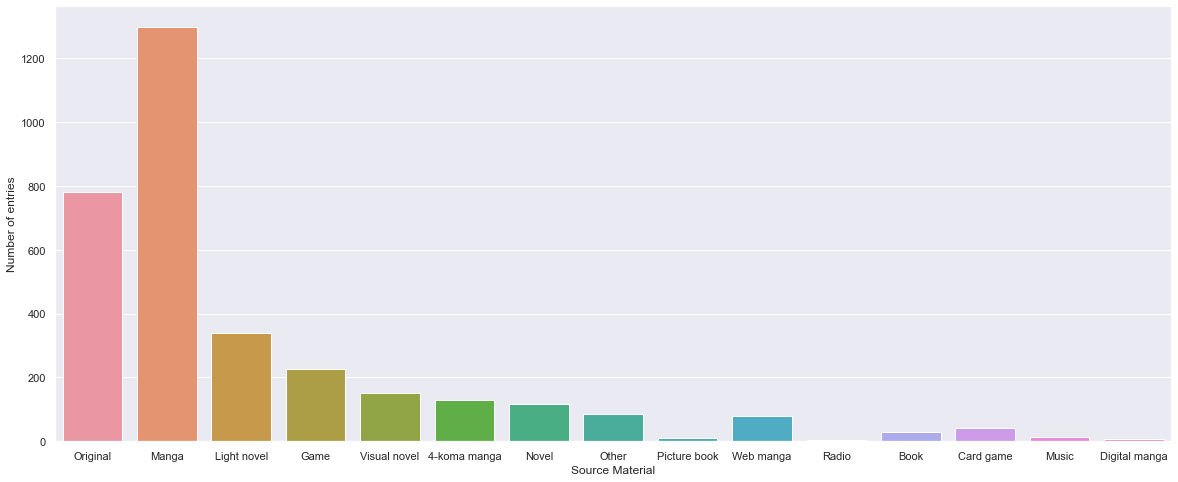

In [6]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))
ax = sns.countplot(x="Source", data=pdf)

plt.xlabel("Source Material")
plt.ylabel("Number of entries")

Best Combination Genre
Best Individual Genre
